#Логистическая регрессия

##Регрессия в случае классификации

В ходе предыдущего занятия мы выяснили, что регрессия состоит в поиске функции $f$, наилучшим образом приближающей зависимость некой целевой переменной $y$ от $x$. Рассматривались **непрерывные величины** вроде расхода калорий, рейтинга, дополнительных затрат и т. д.

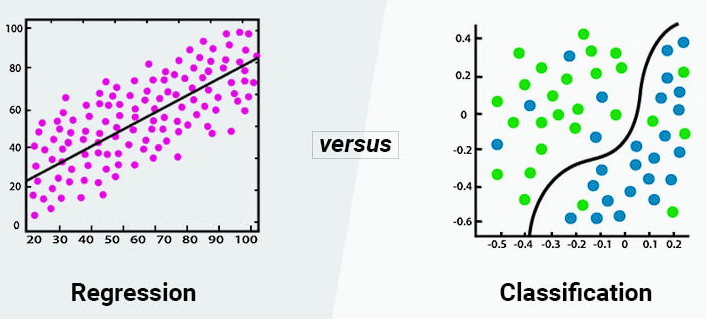

Однако целевая переменная может быть и **дискретной**, то есть принимать значения из конечного набора меток. В таком случае мы говорим о задаче **классификации** — определении метки объекта на основе его характеристик.


###Примеры

1. **Бинарная** классификация.
    - Фото животного — кошка или собака.
    - Анализ настроений в задачах обработки естественного языка — положительный или отрицательный отзыв.
    - Видео — релевантное или нет.
    - Данные анализов — добро- или злокачественное образование.
    - Посты в телеграм-каналах — реклама или основной контент.
2. **Многоклассовая** классификация.
    - Фотографии бабочек — 50 разновидностей.
    - Научные статьи — мало-, средне- и активноцитируемые.
    - Данные об аудиофайлах — музыкальный жанр.
    - Характеристики вещества и термодинамические показатели — агрегатное состояние: твёрдое тело, жидкость, газ и т. д.


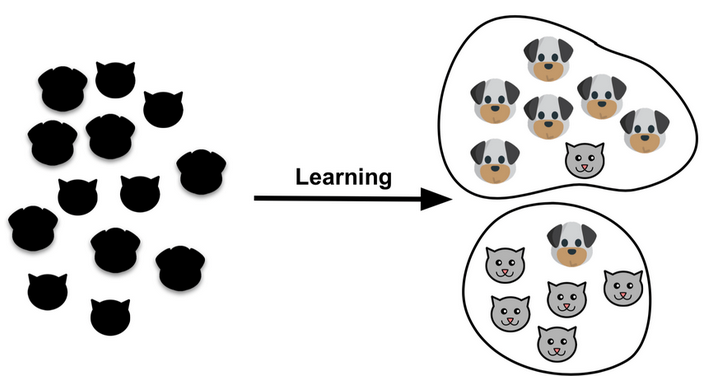

###Постановка задачи

Пусть $n$ — количество рассматриваемых **признаков** объекта, а $m$ — количество различных **классов**. Множество всех различных $K$ меток $\{ y_k \}_{k=1}^{K}$ обозначим за $Y$. Для объекта с набором признаков $x$ и меткой $y$:

$$x = (x_1, x_2, ..., x_n) = \{ x_i \}_{i=1}^{n},$$
$$y \in Y$$

Тогда для решения задачи классификации необходимо **найти функцию** $f$, наилучшим образом **приближающую** зависимость $y$ от $x$:  

$$ f: \mathbb{R}^n \rightarrow Y $$  

Для начала рассмотрим бинарную классификацию, то есть $Y=\{0,\ 1\}$. $1$ — положительная метка, $0$ — отрицательная.

##Решение задачи бинарной классификации

###Понятие перевеса

Мы уже умеем на основе признаков объекта предсказывать какую-то информацию о нём с использованием линейной регрессии. Попытаемся применить старую модель к новой задаче.

Пусть объект относится к положительному классу с вероятностью $p$. Тогда вероятность отношения к отрицательному $1-p$. Тогда по определению **перевесом** ($odds$) будем называть отношение:

$$odds=\frac{p}{1-p}$$

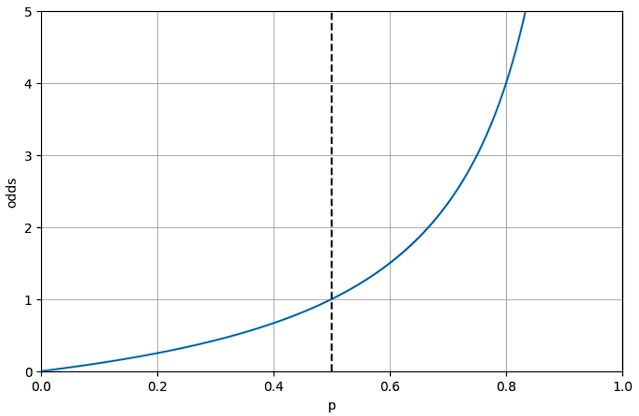

Перевес позволяет улавливать отношение к положительному классу и не отношение к отрицательному. Если вероятность $p$ отношения к положительному больше $0.5$, тогда перевес больше $1$. Если $p<0.5$, то перевес меньше 1. В предельном случае, когда $p=1$, перевес бесконечен, а для $p=0$ получим перевес 0.

Перевес хорошо интерпретируем, однако на данном этапе мы ещё не можем применить линейную регрессию по следующим причинам:

1. Линейная регрессия предсказывает числа на всей оси, $odds$ принимает неотрицательные.
2. odds несимметричен и быстро возрастает при $p>0.5$.

###Понятие логита

Разрабатываемая модель должна быть интерпретируемой и обладать хорошей разделительной способностью. По традиции для быстроизменяющихся функций используют логарифмический масштаб — пересчёт функции с использованием логарифма. Тогда по определению логарифм перевеса, то есть **логит** ($log\ odds$, $logit$):

$$logit = \log{\frac{p}{1-p}}$$

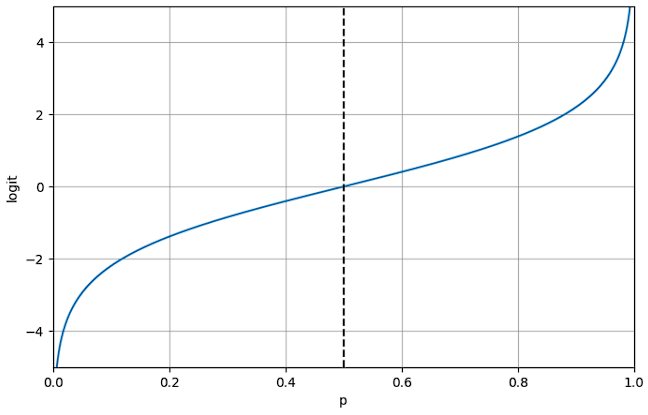

Здесь основание логарифма не имеет значения. Обычно используют натуральный. Как видим из графика, полученное преобразование даёт результат, к которому можно применять модель **линейной регрессии**:

$$f(x) = \sum_{i=1}^n w_i x_i = wx = \log{\frac{p}{1-p}}$$

$$f(x) = \log{\frac{p}{1-p}}$$

###Сигмоида

Будем считать, что логарифм натуральный, то есть по основанию фундаментальной математической константы — числа Эйлера $e$:

$$e=2,718281828459045\dots$$

Пропотенциируем, то есть возведём число $e$ в обе части равенства:

$$e^{f(x)} = \frac{p}{1-p}$$

Выразим вероятность через экспоненту:

$$p = \frac{1}{1+e^{-f(x)}}$$

Полученная функция — пример логистической, то есть разделяющей данные на классы, кривой. Она называется **сигмоидой** и имеет вид:


$$\sigma(z) = \frac{1}{1+e^{-z}}$$

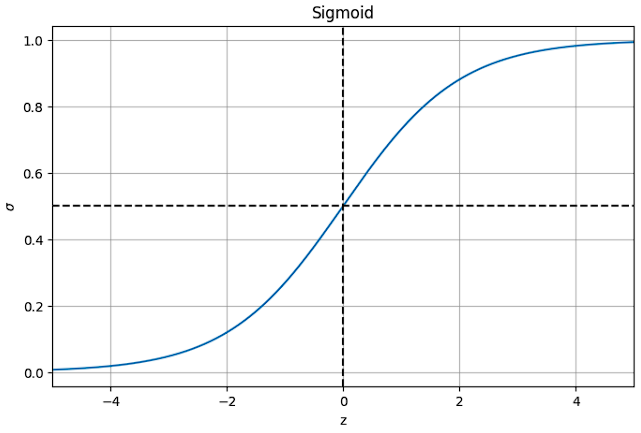

Результаты классификации с использованием сигмоиды хорошо интерпретируемы. Если значение сигмоиды ближе к 1, то класс положительный. Иначе отрицательный. Интуитивно кажется, что для разделения нужно использовать **порог** $0.5$. В простейших случаях так и поступают. На деле порог — ещё один гиперпараметр модели, который нужно подбирать в зависимости от задачи.

##Принцип максимального правдоподобия

###Распределение Бернулли

Аналитической формулы для **получения весов** в логистической регрессии нет. Используем **принцип максимального правдоподобия**.

Пусть в обучающей выборке $i$-е событие обладает меткой $y_i$, а его вероятность, вычисленная с помощью сигмоиды, равна $p_i$. При метке, равной $1$, вероятность этого события $p_i$, а при нуле получим $1-p_i$:

\begin{cases}
p_i, & y_i = 1 \\
1 - p_i, & y_i = 0
\end{cases}

Более кратко учёт одного случая из двух можно записать как:

$$P_i = p_i^{y_i} (1 - p_i)^{1 - {y_i}}, \quad y_i \in \{0, 1\}$$

Вспомним **схему Бернулли**, в которой последовательно происходит несколько независимых испытаний и нужно вычислить, с какой вероятностью эта последовательность может наблюдаться.

###Пример

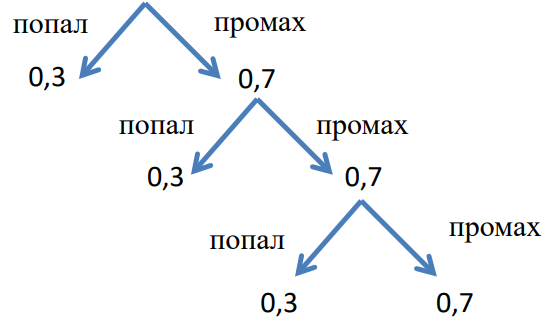

Простой случай знаком вам по задаче о стрелке, который стреляет $n$ раз и попадает в мишень с какой-то вероятностью $p$. Вероятность попадания $k$ раз:

$$P(k) = p \cdot p \dots p \cdot (1 - p) \dots (1 - p) \cdot (1 - p)= p^k (1 - p)^{n - k}$$

С учётом того что $k$ выстрелов можно сделать в разной последовательности, получается знакомая формула:

$$P(k) = C_n^k p^k (1 - p)^{n - k}$$

###Определение и функция

В нашей задаче не будем учитывать последовательность данных в обучающей выборке. Тогда:

$$P = P_1 \cdot P_2 \dots P_N = \prod_{i=1}^{N} P_i = \prod_{i=1}^{N} p_i^{y_i} (1 - p_i)^{1 - y_i}$$

Полученную функцию $P$ называют функцией правдоподобия называют **функцией максимального правдоподобия** ($maximum\ likelihood\ estimation,\ MLE$). Так как в идеальном случае у всех объектов с положительной отметкой $P_i=1$ и у всех отрицательных $P_i=1$, то функция $P$ должна быть равна $1$. В остальных случаях она принимает меньшие значения: от $0$ до $1$. Значит, обучение сводится к повышению значения этой функции в сторону единицы.

**Принцип максимального правдоподобия** — поиск весов модели путём максимизации функции максимального правдоподобия.

##Функция потерь в логистической регрессии

Работать с произведением неудобно. Тем более из-за каждой отдельной ошибки значение функции сильно меняется. В таких случаях используют логарифмический масштаб. Вспомним свойство произведения для логарифма:

$$\log(ab)=\log(a)+\log(b)$$

Обобщая до произведения набора чисел $c_i$:

$$\log \prod_{i=1}^{N} c_i = \sum_{i=1}^{N} \log c_i$$

$$\log(a^n b^m) = \log(a^n) + \log(b^m) = n \log(a) + m \log(b)$$

Перейдём к сумме, взяв логарифм от левой и правой частей записанного выше равенства:

$$\log{P}= \sum_{i=1}^{N} \left(y_i \log(p_i) + (1 - y_i) \log(1 - p_i)\right)$$

Домножим на минус единицу, чтобы работать с функцией, которую можно минимизировать:

$$L(w,\ X,\ y) = -\sum_{i=1}^{N} \left(y_i \log(p_i) + (1 - y_i) \log(1 - p_i)\right)$$

Не забываем, что здесь используется обозначение:

$$p_i = \frac{1}{1+e^{-f(x_i)}}, \quad f(x_i) = \sum_{j=1}^n w^j x_i^j$$

**Функция потерь** — это функция, которая измеряет разницу между предсказанными моделью и фактическими значениями целевой переменной. Именно такой вид она имеет в задаче логистической регрессии. При решении задачи линейной регрессии мы работали с $MAE$, $RMSE$ и прочими.



##Градиентный спуск в логистической регрессии

Для поиска весов всё так же можно использовать градиентный спуск. Для данной задачи градиент функции потерь, вывод которого мы опустим, записывается как:

$$gradient = \sum_{i=1}^{N} (p_i - y_i) x_i$$

Формула обновления весов $w$ с учётом скорости обучения $lr$ в градиентном спуске прежняя:

$$w_{next} = w_{prev} - lr \cdot gradient$$

## Простая реализация логистической регрессии с градиентным спуском на Python

Импортируем numpy, зафиксируем случайность.

In [ ]:
import numpy as np

np.random.seed(42)

Вспомним общую структуру класса модели машинного обучения:

```python
class LogisticRegression:
    def __init__(self, *args, **kwargs):
        ...
    def fit(self, X, Y):
        ..
    def predict(self, X):
        ...
```

Реализуем **инициализацию** логистической модели с учётом $lr$ и максимального числа итераций:

```python
class LogisticRegression:
    def __init__(self, learning_rate, iterations):
        self.lr = learning_rate
        self.iters = iterations
```

Напишем код для **обучения** модели. Передаём в метод `fit()` известные значения признаков и меток, эти наборы обозначим как $X$ и $Y$.

Инициализируем веса случайными значениями. В цикле делаем предсказание $y_{pred}$ с использованием текущих весов $w$ и признаков $x$. Пересчитываем предикт через сигмоиду. Далее обновляем веса по алгоритму градиентного спуска.

```python
def fit(self, X, Y):
    N, n = X.shape
    self.w = np.random.normal(0, 0.2, (n))
    self.b = np.random.normal(0, 0.2, 1)

    for _ in range(self.iters):
        z = np.dot(X, self.w) + self.b
        y_pred = self.sigmoid(z)
        error = y_pred - Y

        dw = (1 / N) * np.dot(X.T, error)
        db = (1 / N) * np.sum(error)

        self.w -= self.lr * dw
        self.b -= self.lr * db

    return self
```

Реализуем сигмоидную функцию. Она не использует свойств отдельного экземляра класса `LogisticRegression`, поэтому оформляем её как `staticmethod`:

```python
@staticmethod
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
```

Модель обучена. Теперь её можно использовать для **предсказания** целевой переменной на основе переданных признаков $X$.

```python
def predict(self, X):
    z = np.dot(X, self.w) + self.b
    return self.sigmoid(z)
```

Воспользуемся написанным кодом, запустим ячейку с реализованным классом.

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate, iterations):
        self.lr = learning_rate
        self.iters = iterations

    def fit(self, X, Y):
        N, n = X.shape
        self.w = np.random.normal(0, 0.2, (n))
        self.b = np.random.normal(0, 0.2, 1)

        for _ in range(self.iters):
            z = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(z)
            error = y_pred - Y

            dw = (1 / N) * np.dot(X.T, error)
            db = (1 / N) * np.sum(error)

            self.w -= self.lr * dw
            self.b -= self.lr * db

        return self

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        return self.sigmoid(z)

## Пример решения простой задачи. Классификация снарядов в баллистике

###Постановка задачи

Допустим, у нас имеется **пушка**. Из неё произвели 1000 выстрелов в направлении стенки известной фиксированной высоты $h$, расположенной в направлении выстрела на фиксированном расстоянии $L$. Снаряды вылетали под разными углами $\alpha$ к горизонту с начальными скоростями $v_0$​.

Необходимо разработать модель, которая позволит предсказывать результат полёта для новых выстрелов на основе их начальных условий.


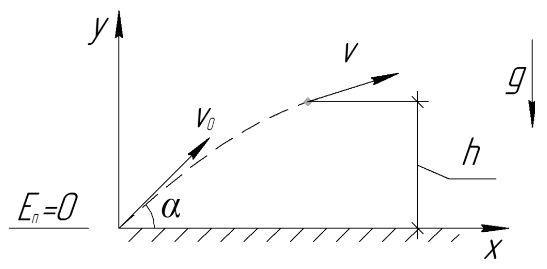

###Формулы баллистики

Напомним основные формулы для описания движения тела под углом к горизонту. Время полёта:

$$t = \frac{L}{v_0 \cos(\alpha)}$$

Высота снаряда в произвольный момент времени $t$:

$$y(t) = v_0 \sin(\alpha) t - \frac{1}{2} g t^2$$

Синтетический датасет с углами и скоростями:

In [ ]:
N = 1000
h = 5.0
L = 100.0
g = 9.81

np.random.seed(42)
alphas = np.random.uniform(0, np.pi/2, N)
v0s = np.random.uniform(10, 100, N)

times = L / (v0s * np.cos(alphas))
heights = v0s * np.sin(alphas) * times - 0.5 * g * times ** 2
states = (heights >= h).astype(int)

X = np.column_stack((alphas, v0s))
y = states

Примеры данных. Здесь угол рассчитан в радианах:

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'alpha': X[:, 0],
    'v0': X[:, 1],
    'state': y
})

df.head()

,alpha,v0,state
0,0.588326,26.661964,0
1,1.493379,58.771085,0
2,1.149813,88.565125,1
3,0.940371,75.900240,1
4,0.245074,82.590503,1


###Решение

Посмотрим распределение данных по классам.

In [ ]:
df['state'].value_counts()

,count
state,
1,576
0,424


Датасет не совсем сбалансирован, но такое соотношение терпимо.

Разделим выборку для тренировочную и тестовую.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Стандартизируем признаки.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Инициализируем и обучим модель.

In [ ]:
lr_model = LogisticRegression(learning_rate=0.001, iterations=100000)
lr_model.fit(X_train, y_train)

Проанализируем результаты обучения

In [ ]:
print(lr_model.w, lr_model.b)

[0.21735564 1.97040241] [0.57849658]


Скорость вылета снаряда примерно в 10 раз сильнее объясняет разделение на классы в сравнении с углом вылета.

Сделаем предикт для тестовых данных.

In [ ]:
y_pred = lr_model.predict(X_test)

Оценим качество обучения модели. Используем самую простую метрику — **accuracy** (точность). Для правильно классифицированных объектов она даёт $1$, для ошибок — $0$. В итоге вычисляетсся отношение числа правильно классифицированных объектов к общему числу.

$$accuracy = \frac{1}{N} \sum_{i=1}^{N} \mathbb{1}(y_{i,pred} = {y}_i)$$

Границу для разделения предсказаний метки сигмоидой примем за $0.5$.

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.835


Интерпретировать точность следует так. Для классификации на $N$ классов простое угадываение в среднем даёт точность $accuracy=\frac{1}{N}$. Для бинарной классификации это $0.5$. Наша модель действительно обучилась и верно классифицирует около $84\%$ данных.

##Способы оценки качества работы моделей классификации

**Матрица ошибок** (confusion matrix) — квадратная таблица размерности $K \times K$, где $K$ — количество различных классов. Её столбцы отражают истинные значения, а строки — предикт.

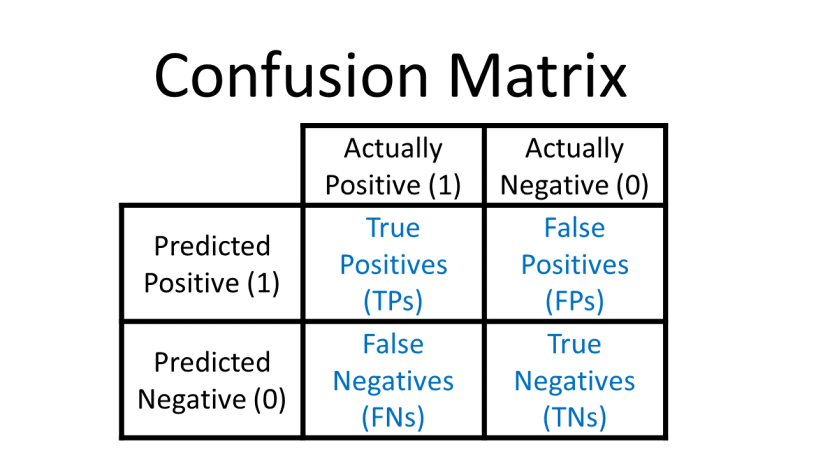

Далее введём обозначения:

1. T (**true**) — модель классификации права.
2. F (**false**) — модель ошиблась.
3. P (**positive**) — предсказана положительная метка $1$.
4. N (**negative**) — предсказана отрицательная метка $0$.

Рассмотрим различные комбинации:

1. TP — **истина положительная** (класс 1 классифицирован как класс 1)
2. TN — **истина отрицательная** (класс 0 классифицирован как класс 0)
3. FP — **ложная положительная** (класс 0 определён как 1)
4. FN — **ложная отрицательная** (класс 1 определён как 0)

Импортируем нужные функции из sklearn.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

Протестируем на нашем примере.

In [ ]:
confusion_matrix(y_test, y_pred)

array([[75, 16],
       [17, 92]])

Во введённых обозначениях точность — это отношение правильных ответов ко всем:

$$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

**Полнота** (recall) — отношение числа классифицированных как положительные объектов к общему числу положительных объектов:

$$recall = \frac{TP}{TP + FN}$$

Чем выше полнота, тем меньше мы пропускаем положительных результатов. Например, эта метрика важна в **медицине**, когда при первичном анализе лучше давать больше заключений о наличии заболевания и отправлять пациента на дальнейший анализ, чем ошибочно принимать больных за здоровых и давать заболеванию развиваться.

In [ ]:
recall_score(y_test, y_pred)

0.8440366972477065

**Точность** (precision) — отношение действительно положительных объектов к числу положительных предсказаний.

$$precision = \frac{TP}{TP + FP}$$

Показывает, насколько можно доверять алгоритму. Чем выше, тем увереннее модель в положительных предсказаниях. В медицине способна помочь снизить число случаев, когда пациентов без заболеваний отправляют на дополнительные обследования — FP.

In [ ]:
precision_score(y_test, y_pred)

0.8518518518518519

Медицинские примеры показали, что полнота и точность лучше использовать в паре. Сещуствует интегральная, то есть комбинированная метрика **F-мера** (F1) — их среднее гармоническое:

$$F1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$

В обозначениях матрицы ошибок:

$$F1 = \frac{2TP}{2TP + FP + FN}$$

Эта метрика одновременно помогает идентифицировать положительные экземпляры и минимизирует ложные срабатывания.

In [ ]:
f1_score(y_test, y_pred)

0.847926267281106

##Решение реальной задачи с Kaggle. Классификация добро- и злокачественных опухолей

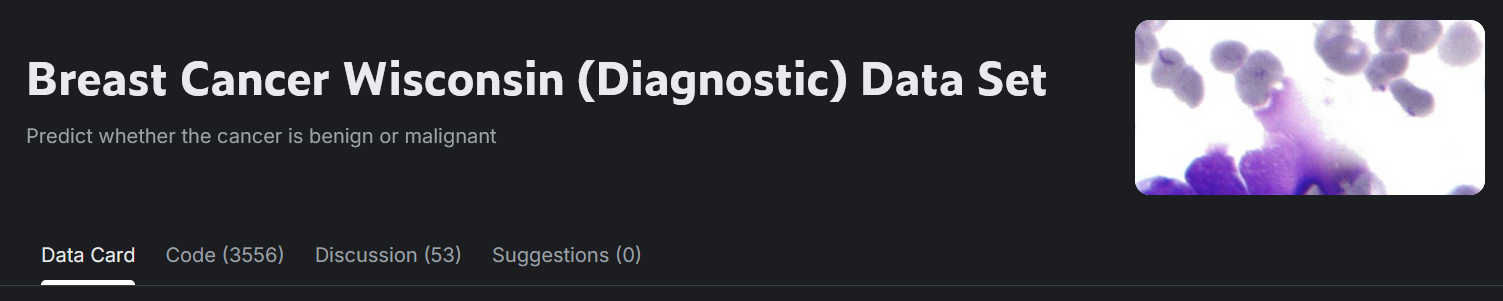

[Датасет](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) о раке груди (Breast Cancer Wisconsin Diagnostic Data Set) содержит информацию о характеристиках клеточных ядер грудных опухолей. Данные включают 30 признаков, описывающих радиус, текстуру, площадь и прочие характеристики клеточных ядер.

В наборе содержится 569 экземпляров, из которых 357 относятся к доброкачественным (benign), а 212 — к злокачественным (malignant). В наборе отсутствуют недостающие значения.

Необходимо обучить модель, которая по данным об опухоли классифицирует её как добро- или злокачественную.

###Сбор данных

Установим библиотеку для скачивания датасета

In [ ]:
!pip install -q opendatasets

Сохраним токен Kaggle в необходимой для opendatasets директории.

In [ ]:
from google.colab import files
import os

uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


Скачаем датасет.

In [ ]:
import opendatasets as od

url = 'https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data'
od.download(url)

Skipping, found downloaded files in "./breast-cancer-wisconsin-data" (use force=True to force download)


In [ ]:
os.listdir('./breast-cancer-wisconsin-data')

['data.csv']

###Исследование данных

Импортируем основные библиотеки для анализа данных.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('./breast-cancer-wisconsin-data/data.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Имеется 569 записей с 33 признаками.

In [ ]:
data.shape

(569, 33)

Есть пустой столбец. На этапе предобработки данных удалим его. В остальных столбцах пропуски отсутствуют.

In [ ]:
data.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


Посмотрим соотношение классов.

In [ ]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


Датасет несбалансирован, но это терпимо.

Построим матрицу корреляции. Она показывает, есть ли между признаками линейная связь. Признаки с такой связью значительно снижают эффективность линейных моделей, одной из которых является логистическая регрессия.

<Axes: >

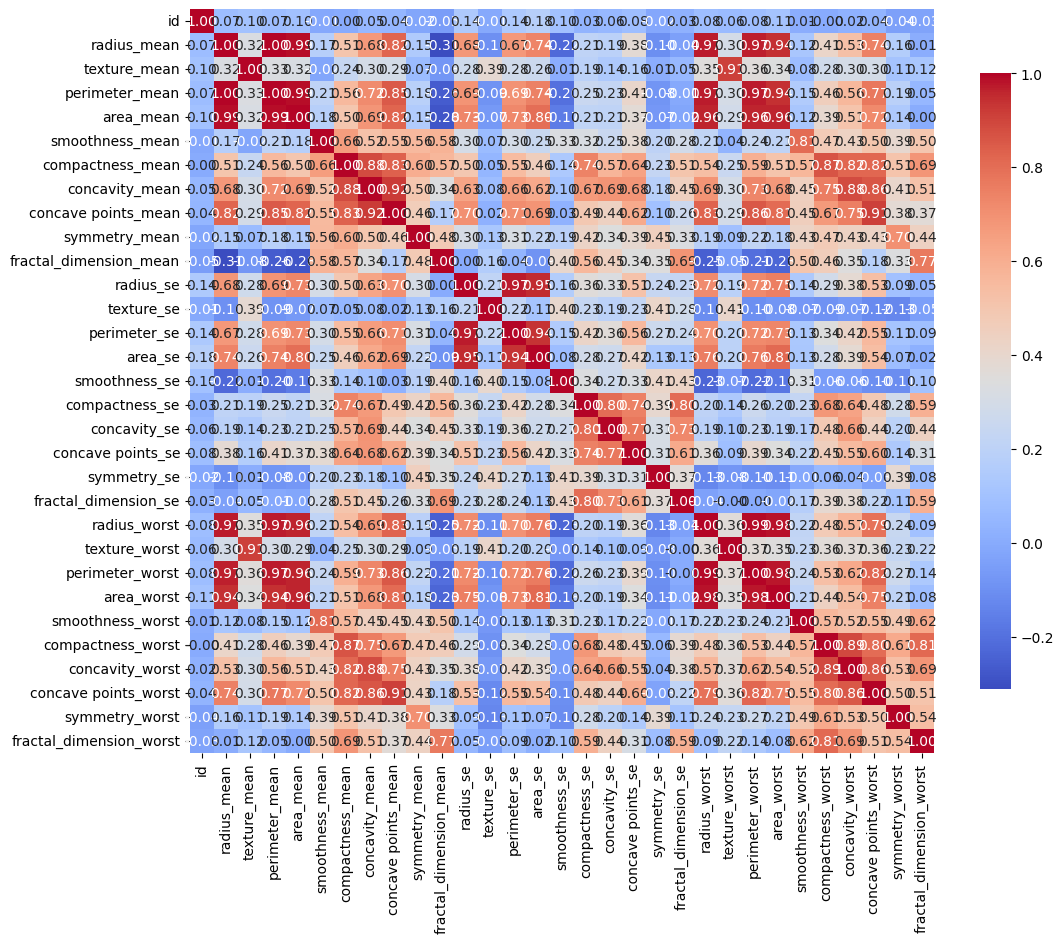

In [ ]:
import seaborn as sns

corr = data.drop(columns=['diagnosis']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

Данные о радиусе, периметре и площади явно коррелируют, что очевидно.

###Подготовка данных

Удалим заведомо ненужные колонки.

In [ ]:
data = data.drop(columns=['Unnamed: 32', 'id'])

Закодируем целевую переменную

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Разобьём данные на признаки и целевую переменную.

In [ ]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

Разделим размеченную выборку на train и valid в соотношении 80 / 20.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

Обойдёмся простым удалением коррелирующих признаков. Хорошим тоном является обучение интерпертируемой модели, например случайного леса, и дальнейший отбор наиболее важных признаков.

In [ ]:
X_train = X_train.drop(columns=['radius_worst', 'perimeter_worst', 'area_worst', 'perimeter_mean', 'area_mean'])
X_valid = X_valid.drop(columns=['radius_worst', 'perimeter_worst', 'area_worst', 'perimeter_mean', 'area_mean'])

Стандартизируем данные.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

###Моделирование

Инициализируем и обучим модель.

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

Сделаем предикт.

In [ ]:
y_pred = classifier.predict(X_valid)

###Оценка качества работы модели

Воспользуемся упомянутыми выше метриками.

In [ ]:
accuracy_score(y_valid, y_pred)

0.9736842105263158

Точность составила $97\%$!

In [ ]:
confusion_matrix(y_valid, y_pred)

array([[70,  1],
       [ 2, 41]])

Модель ошибочно классифицировала два "+" образования как "-" И одно "-" как "+". Остальные предсказания верны. Это высокий результат. Правильная обработка коррелирующих признаков помогает его улучшить.

##Многоклассовая классификация

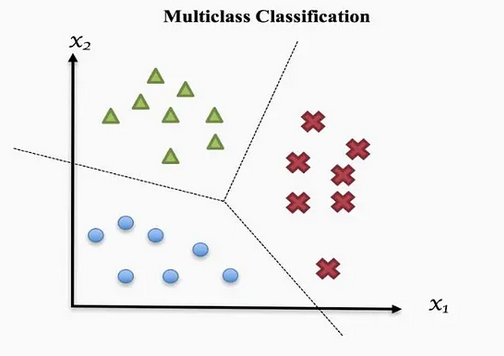

###Логистическая регрессия на несколько классов

Логистическая регрессия в случае бинарной классификации основывается на том, что мы используем линейную регрессию для предсказания логарифма перевеса отношения объекта к положительному классу относительно отрицательного.

Попытаемся применить **линейную регрессию** и к случаю, когда у нас **$K$ классов**, то есть набор меток имеет вид $Y=\{1,\ 2, \dots, K\}$. Тогда для отношения к $k$-му классу мы можем использовать отдельную функцию $f_k(x)$ со своими весами $w_k$:

$$f_k(x) = w_k x$$

Выше переход от функции $f$ к вероятности получался благодаря сигмоиде. В случае многоклассовой классификации используем оператор **$softmax$**. Для каждого $k$-го класса вычисляется число $z_k = f_k(w)$. Если поделить каждое значение $z_k$ на их сумму, получим значения от 0 до 1 — вероятности принадлежности к классам.

$$\text{softmax}(z_1, \ldots, z_K) = \left( \frac{\exp(z_1)}{\sum_{k=1}^{K} \exp(z_k)}, \ldots, \frac{\exp(z_K)}{\sum_{k=1}^{K} \exp(z_k)} \right)$$

Выбираем позицию, для которой вероятность максимальна. Её номер и будет номером класса, который предсказывает наша модель.

Оптимизация выполняется аналогично с помощью принципа максимального правдоподобия.

Отдельно отметим, что реализованная в sklearn `LogisticRegression` исходно поддерживает многоклассовую классификацию.

###Общие подходы к многоклассовой классификации


###One-vs-All

Подход **один против всех** (one-vs-all) состоит в том, что для каждого класса мы отдельно обучаем модель $a_k(x)$, которая определяет, относится ли объект к этому классу. Затем для каждого объекта выбираем наиболее уверенный классификатор, присваиваем его метку.

$$a(x) = k: a_k(x) \rightarrow max$$

Именно этот подход использует `LogisticRegression` из sklearn.

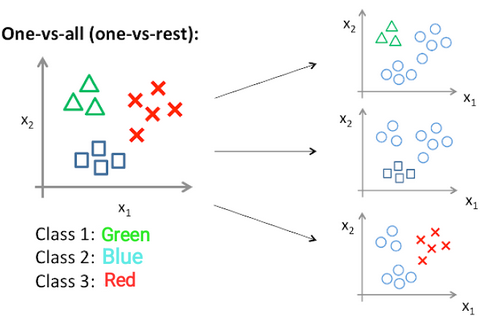

###One-vs-One

Подход каждый против каждого (one-vs-one) состоит в том, что мы для каждой пары классов $i$ и $j$ обучаем классификатор $a_{ij}(x)$, который разделяет их между собой. Всего $\frac{K(K-1)}{2}$ классификаторов. Затем для нужного объекта складываем предсказания ото всех классификаторов и выбираем класс, у которого больше всего голосов.

$$a(x) = k: \sum_{i=1}^K \sum_{j \neq i}^K 1[a_{ij}(x) = k] \rightarrow max$$

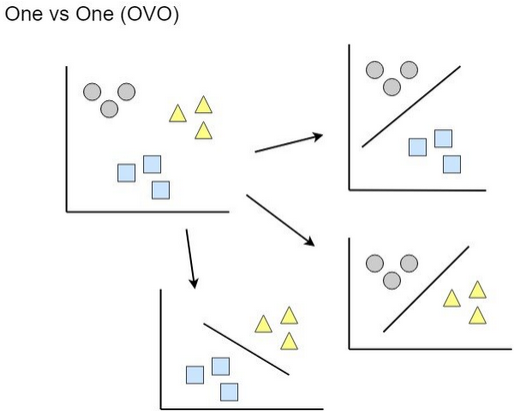

#Выводы

В ходе данного занятия мы:

1. Ознакомились с примерами и типами классификации.
2. Математически формализовали задачу логистической регрессии.
3. Вывели сигмоиду.
4. Получили выражение для функции потерь в логистической регрессии.
5. Реализовали простой логистический регрессор.
6. Решили задачу классификации баллистических снарядов.
7. Рассмотрели основные метрики классификации.
8. Решили задачу бинарной классификации онкообразований с Kaggle.
9. Ознакомились со способами многоклассовой классификации.


##Данные об авторе

Зюков Алексей Алексеевич,

лаборант отдела-онлайн образования НИЯУ МИФИ,

бакалавр кафедры суперкомпьютерных технологий в инженерно-физическом моделировании НИЯУ МИФИ.

##Список использованной и рекомендованной литературы

1. Егоров, А. Д. Репозитории с лекциями по анализу данных в НИЯУ МИФИ. – Текст : электронный / А. Д. Егоров // GitHub : [сайт]. – URL: https://github.com/ShadarRim (дата обращения: 01.11.2025).
2. Логит-анализ // MachineLearning.ru : [сайт]. – Москва. – URL: http://www.machinelearning.ru/wiki/index.php?title=Логит-анализ (дата обращения: 01.11.2025).
3. Малов, Д. А. Глубокое обучение и анализ данных : практическое руководство. / Д. А. Малов. – Текст : непосредственный. – Санкт-Петербург : БХВ-Петербург, 2023. – 272 с. : ил. – ISBN 978-5-9775-1172-8.
4. Петренко, А. Пережевывая логистическую регрессию. – Текст : электронный / А. Петренко // Хабр : [сайт]. – URL: https://habr.com/ru/articles/485872/ (дата обращения: 01.11.2025).
5. Синицин, Ф. Линейные модели. – Текст : электронный / Ф. Синицин, Е. Соколов ; Яндекс.Образование. – URL: https://education.yandex.ru/handbook/ml/article/linear-models (дата обращения: 01.11.2025).

#Приложения. Код для построения иллюстраций

##График зависимости перевеса от вероятности

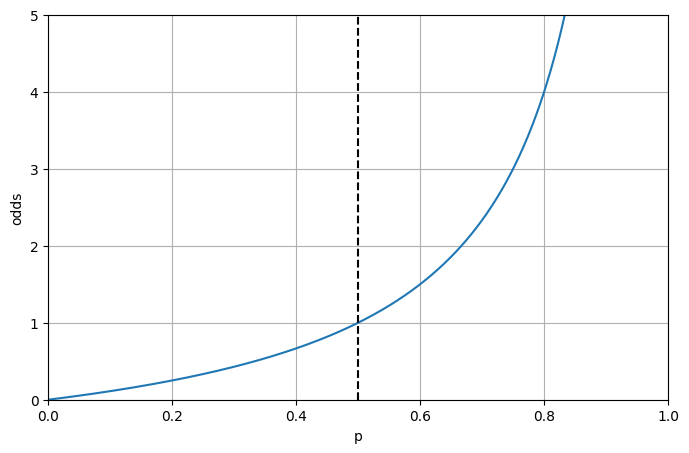

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

eps = 1e-5
p = np.linspace(eps, 1 - eps, 1000)
odds = p / (1 - p)

plt.figure(figsize=(8, 5))
plt.plot(p, odds)
plt.xlabel('p')
plt.ylabel('odds')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.axvline(0.5, color='black', linestyle='--')
plt.show()


##График зависимости логита от вероятности

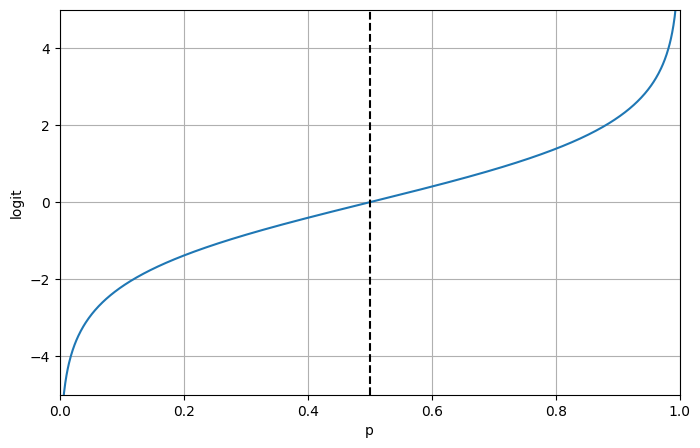

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

eps = 1e-5
p = np.linspace(eps, 1 - eps, 1000)
logit = np.log(p / (1 - p))

plt.figure(figsize=(8, 5))
plt.plot(p, logit)
plt.xlabel('p')
plt.ylabel('logit')
plt.grid()
plt.xlim(0, 1)
plt.ylim(-5, 5)
plt.axvline(0.5, color='black', linestyle='--')
plt.show()


##График сигмоиды

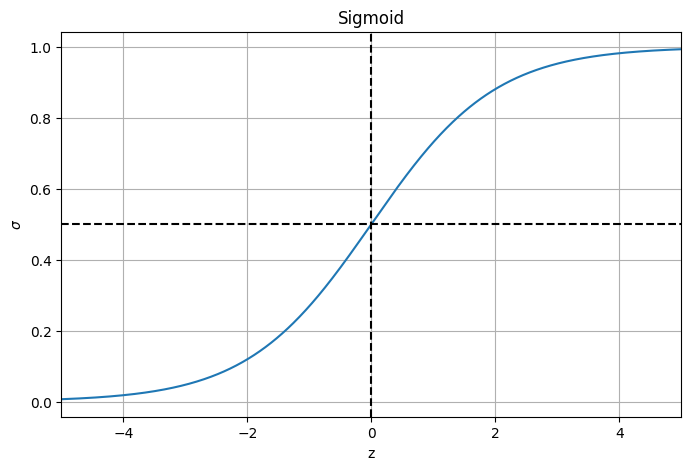

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


l = 5
z = np.linspace(-l, l, 1000)
sigma = 1 / (1 + np.exp(-z))

plt.figure(figsize=(8, 5))
plt.plot(z, sigma)
plt.title('Sigmoid')
plt.xlabel('z')
plt.ylabel(r'$\sigma$')
plt.xlim(-l, l)
plt.grid()
plt.axhline(0.5, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.show()